# Calculating portfolio returns

In order to build and backtest a portfolio, you need to have the returns of multiple assets in a single object

Our model portfolio consists of the following companies and the weight in our portfolio represented by percentages:

* Bitcoin 20%
* Apple 12%
* Microsoft 15%
* Exxon Mobil 8%
* JP Morgan 9%
* Amazon 10%
* Facebook 5%
* AT&T 16%
* Tesla 5%

Note: The portfolio weights should sum up to 100% in most cases

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
Date         365 non-null int64
Open         365 non-null float64
High         365 non-null float64
Low          365 non-null float64
Close        365 non-null float64
Adj Close    365 non-null float64
Volume       365 non-null int64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


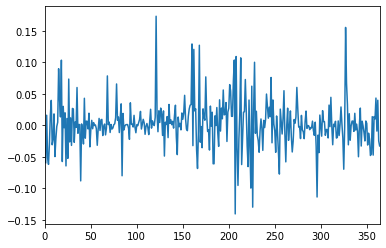

In [13]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])
btc = btc.sort_values(by='Date')
btc.set_index('Date', inplace=False)
btc['Date'] = pd.to_datetime(btc['Date']).astype(np.int64)

btc.info()

btc['Returns'] = btc['Adj Close'].pct_change()
btc['Returns'].plot()
plt.show();

In [19]:
# Define the portfolio weights as a numpy array
portfolio_weights = np.array([0.20, 0.12, 0.15, 0.08, 0.09, 0.10, 0.05, 0.16, 0.05])

# Calculate the weighted stock returns
WeightedReturns = btc[:9]['Returns]'.mul(portfolio_weights)
print(WeightedReturns)
# Calculate the portfolio returns
#btc['Portfolio'] = WeightedReturns.sum()

# Plot cumulative portfolio returns over time
#CumulativeReturns = ((1 + btc['Portfolio']).cumprod()-1)
#CumulativeReturns.plot()
#plt.show();

# THIS CAN'T BE RIGHT

SyntaxError: invalid syntax (<ipython-input-19-f127dfee0e45>, line 6)

# Calculate the daily returns of the adjusted close price

                  Date         Open         High          Low        Close  \
0  1543708800000000000  4200.733398  4301.519531  4110.978516  4139.877930   
1  1543795200000000000  4147.323730  4155.979492  3840.446289  3894.130859   
2  1543881600000000000  3886.294922  4075.627686  3832.750000  3956.893799   
3  1543968000000000000  3958.894775  3969.535889  3753.994873  3753.994873   
4  1544054400000000000  3754.074463  3874.966064  3521.101807  3521.101807   

     Adj Close      Volume   Returns  
0  4139.877930  5262697895       NaN  
1  3894.130859  5089570993 -0.059361  
2  3956.893799  5028069239  0.016117  
3  3753.994873  5302481573 -0.051277  
4  3521.101807  5878333109 -0.062039  


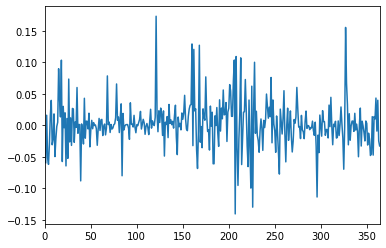

In [3]:
btc['Returns'] = btc['Adj Close'].pct_change()

# Check first five rows
print(btc.head())

# Plot the returns column over time
btc['Returns'].plot()
plt.show();

# Return Distributions

In order to analyze the probability of outliers in returns, visualize the historical returns using a histogram

You can use the histogram to show the historical density or frequency of a given range of returns

Note: The outliers on the left tail of the return distribution are what you want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally good events for the security

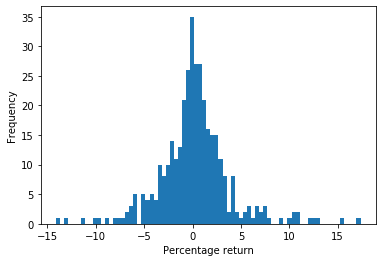

In [4]:
# Convert decimal returns into percentage returns
percent_return = btc['Returns']*100

# Drop missing values
returns_plot = percent_return.dropna()

# Plot the returns
plt.hist(returns_plot, bins=75)
plt.xlabel('Percentage return')
plt.ylabel('Frequency')
plt.show();